# **Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")
print("Dataste imported successfully")

Dataste imported successfully


In [6]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
X = df.iloc[:, [3, 4]].values

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

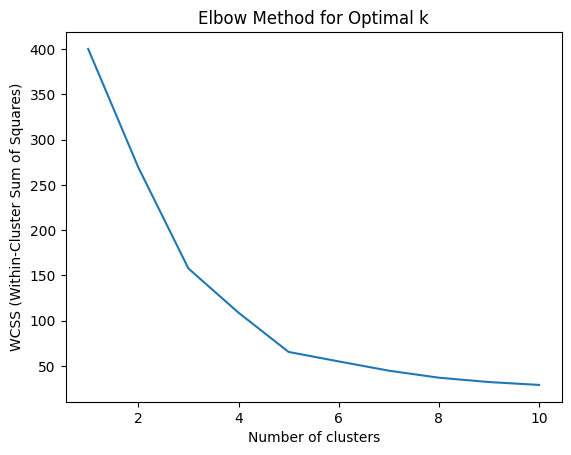

In [9]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [10]:
# Based on the Elbow Method, choose the optimal number of clusters (k)
k = 5

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)


In [11]:
# Add the cluster labels to the original dataset
df['Cluster'] = y_kmeans


In [14]:
# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

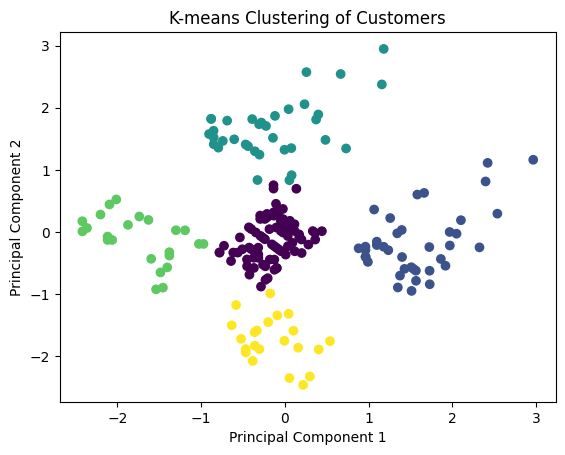


Cluster 0:

       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster  
count     81.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1:

       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000           39.000000            

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the information about each cluster
for cluster in range(k):
    print(f"\nCluster {cluster}:\n")
    print(df[df['Cluster'] == cluster].describe())